In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Volumes/USB20FD/Spring2017/Visualization/Project/Project_Data/2015_Street_Tree_Census_-_Tree_Data.csv'
fields = ['boroname']
df = pd.read_csv(path, usecols=fields)

In [3]:
df = df['boroname'].value_counts()

In [4]:
df

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: boroname, dtype: int64

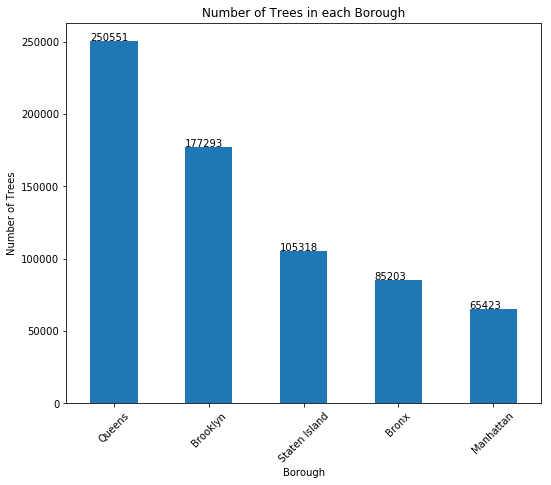

In [5]:
ax = df.plot(kind='bar', title="Number of Trees in each Borough", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

In [6]:
df['Queens'] = df['Queens']/109
df['Brooklyn'] = df['Brooklyn']/71
df['Staten Island'] = df['Staten Island']/58.5
df['Manhattan'] = df['Manhattan']/22.83
df['Bronx'] = df['Bronx']/42

In [7]:
df

Queens           2298
Brooklyn         2497
Staten Island    1800
Bronx            2028
Manhattan        2865
Name: boroname, dtype: int64

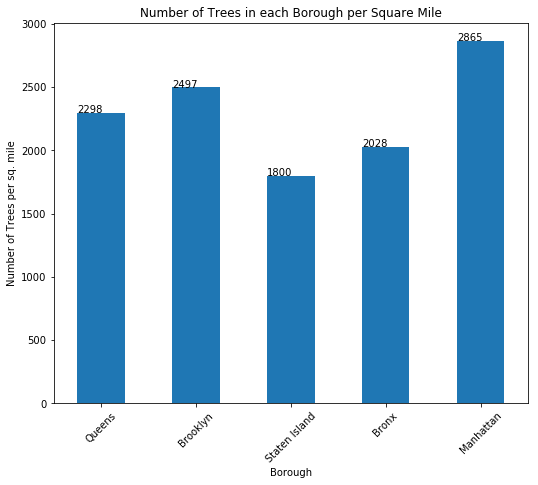

In [8]:
ax = df.plot(kind='bar', title="Number of Trees in each Borough per Square Mile", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees per sq. mile")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

In [9]:
import gmplot

In [10]:
df2 = pd.read_csv(path, usecols=['latitude', 'longitude'])
latitudes = df2.latitude.tolist()
longitudes = df2.longitude.tolist()

In [11]:
import gmplot

gmap = gmplot.GoogleMapPlotter.from_geocode("New York City")

gmap.scatter(latitudes[0:50], longitudes[0:50], 'red', size=40, marker=True)
gmap.draw("treemap.html")

In [37]:
import numpy as np
from scipy import stats

xmin, xmax = min(latitudes[0:400]), max(latitudes[0:400])
ymin, ymax = min(longitudes[0:400]), max(longitudes[0:400])

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([latitudes[0:400], longitudes[0:400]])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)


array([ 3.26907211,  3.65270645,  4.02205433,  4.36492231,  4.66913327,
        4.92329233,  5.1175935 ,  5.24457402,  5.29971308,  5.28178171,
        5.19288394,  5.03817834,  4.82532457,  4.56374624,  4.26382836,
        3.93616751,  3.59096742,  3.23762943,  2.88453933,  2.53901195,
        2.20733262,  1.89483184,  1.6059454 ,  1.34423643,  1.11238186,
        0.91214344,  0.74435086,  0.60892038,  0.50492105,  0.43068679,
        0.38396095,  0.36205413,  0.36199514,  0.38066019,  0.41487173,
        0.46146594,  0.51733301,  0.57943792,  0.64483025,  0.71065173,
        0.77414866,  0.83269573,  0.88383566,  0.9253372 ,  0.95527119,
        0.97210047,  0.97477557,  0.96282435,  0.93642158,  0.89642494,
        0.84436637,  0.7823939 ,  0.71316597,  0.63970782,  0.56524587,
        0.49303877,  0.42622372,  0.367692  ,  0.32000038,  0.28531651,
        0.26538833,  0.26152194,  0.27455134,  0.3047867 ,  0.35193637,
        0.41500856,  0.49221115,  0.58087773,  0.67745314,  0.77

In [47]:
fig = plt.figure()
fig.set_size_inches(30, fig.get_figwidth(), forward=True)
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(latitudes[0:400], longitudes[0:400], 'k.', markersize=2)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("KDE of tree data")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'title'